Ejemplo **Cluster usando K-means**

Este enfoque nos permite agrupar los datos en un número específico de clústeres, de manera que los puntos de datos en el mismo grupo estén relacionados, mientras que los ubicados en otro clúster están más lejanos. Esta distancia es medida frecuentemente a través de la distancia euclidiana. En otras palabras, el algoritmo K-Means intenta minimizar las distancias de los datos dentro de un mismo clúster y maximizar la distancia entre los diferentes clústeres.

Es el algoritmo mas utilizado en las tecnicas de aprendizaje no supervisado.
Este algoritmo busca a traves de los centroides ir acercando los puntos mediante el movimiento de centroides, menor distancia intra centroides y mayor distancia extracentroides

In [ ]:
#importamos librerias
import pandas as pd               # manejo de base de datos
import numpy as np                # uso matrices
import matplotlib.pyplot as plt   #para graficar
import seaborn as sns             #mejorar graficos
import warnings                   #manejo de advertencias
warnings.filterwarnings('ignore')


In [ ]:
# cargar los datos que estan separados por tabulaciones
df_mark = pd.read_excel("02 IMI 05JUN.xlsx")

In [ ]:
#para poder observar todas las variables
#cuando son muchas, por default no se muestran
pd.set_option('display.max_columns',100)

In [ ]:
#informacion de el tipo de dato de cada variable
df_mark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Marca temporal                 16 non-null     object
 1   Nombre de usuario              16 non-null     object
 2   Número de Control (Matricula)  16 non-null     int64 
 3   Genero                         16 non-null     object
 4   Semestre                       16 non-null     object
 5   Carrera                        16 non-null     object
 6   Modalidad                      16 non-null     object
 7   Edad                           16 non-null     int64 
 8   whatsApp con el profesor       16 non-null     object
 9   Interest_01                    16 non-null     int64 
 10  Pressure_01                    16 non-null     int64 
 11  choice_01                      16 non-null     int64 
 12  competence_01                  16 non-null     int64 
 13  Interes

In [ ]:
df_mark.head()

,Marca temporal,Nombre de usuario,Número de Control (Matricula),Genero,Semestre,Carrera,Modalidad,Edad,whatsApp con el profesor,Interest_01,Pressure_01,choice_01,competence_01,Interest_02,Pressure_02,competence_02,Interest_03,Pressure_03,Interest_04,choice_02,competence_03,Pressure_04,Interest_05,choice_03,competence_04,Interest_06,Pressure_05,choice_04,Interest_07,choice_05,competence_05,Cluster
0,2024/04/13 12:07:25 p.m. GMT-6,a20050032@itsperote.edu.mx,20050032,Femenino,Sexto,Ingeniería Informática,Sabatino,22,Si,5,5,6,4,5,4,4,4,5,5,5,5,5,5,5,5,6,5,5,7,5,7,0
1,2024/04/13 12:08:02 p.m. GMT-6,a21050013@itsperote.edu.mx,21050013,Femenino,Sexto,Ingeniería Informática,Sabatino,20,Si,6,5,6,7,6,5,6,6,7,6,6,7,6,7,6,5,7,6,6,5,7,6,0
2,2024/04/13 12:44:20 p.m. GMT-6,a21050022@itsperote.edu.mx,21050022,Femenino,Sexto,Ingeniería Informática,Sabatino,20,Si,7,7,7,7,6,7,5,7,6,6,5,6,7,5,7,7,6,6,7,7,7,6,0
3,2024/04/13 3:11:11 p.m. GMT-6,a22050042@itsperote.edu.mx,22050042,Femenino,Cuarto,Ingeniería Informática,Sabatino,26,Si,6,6,2,7,7,5,4,7,5,5,5,5,4,5,6,6,6,5,4,6,2,6,2
4,2024/04/13 4:32:20 p.m. GMT-6,a23050027@itsperote.edu.mx,23050027,Masculino,Segundo,Ingeniería Informática,Sabatino,27,No,1,2,1,1,1,1,3,3,1,1,1,1,1,2,2,1,6,1,5,2,6,2,1


In [ ]:
#cambiar de categorico a numerico  por forma de mapeo
sex_={'Femenino':1,'Masculino':0}
sem_= {'Segundo':2,'Cuarto':4,'Sexto':6}
whatapp_= {'Si':1,'No':0}
df_mark2 = df_mark.loc[:,['Genero','Semestre','whatsApp con el profesor']]
df_mark3 = df_mark.loc[:,['Genero','Semestre','whatsApp con el profesor']]
df_mark2.head()

,Genero,Semestre,whatsApp con el profesor
0,Femenino,Sexto,Si
1,Femenino,Sexto,Si
2,Femenino,Sexto,Si
3,Femenino,Cuarto,Si
4,Masculino,Segundo,No


In [ ]:
df_mark2['Genero']= df_mark2['Genero'].map(sex_)
df_mark2['Semestre']= df_mark2['Semestre'].map(sem_)
df_mark2['whatsApp con el profesor']= df_mark2['whatsApp con el profesor'].map(whatapp_)
df_mark2.head(6)

,Genero,Semestre,whatsApp con el profesor
0,1,6,1
1,1,6,1
2,1,6,1
3,1,4,1
4,0,2,0
5,1,4,1


In [ ]:
#se eliniman las columnas categoricas para sustituirlas por numericas
numerica= df_mark.drop(['Genero','Semestre','Carrera','Modalidad','whatsApp con el profesor'],axis=1)
numerica

,Marca temporal,Nombre de usuario,Número de Control (Matricula),Edad,Interest_01,Pressure_01,choice_01,competence_01,Interest_02,Pressure_02,competence_02,Interest_03,Pressure_03,Interest_04,choice_02,competence_03,Pressure_04,Interest_05,choice_03,competence_04,Interest_06,Pressure_05,choice_04,Interest_07,choice_05,competence_05,Cluster
0,2024/04/13 12:07:25 p.m. GMT-6,a20050032@itsperote.edu.mx,20050032,22,5,5,6,4,5,4,4,4,5,5,5,5,5,5,5,5,6,5,5,7,5,7,0
1,2024/04/13 12:08:02 p.m. GMT-6,a21050013@itsperote.edu.mx,21050013,20,6,5,6,7,6,5,6,6,7,6,6,7,6,7,6,5,7,6,6,5,7,6,0
2,2024/04/13 12:44:20 p.m. GMT-6,a21050022@itsperote.edu.mx,21050022,20,7,7,7,7,6,7,5,7,6,6,5,6,7,5,7,7,6,6,7,7,7,6,0
3,2024/04/13 3:11:11 p.m. GMT-6,a22050042@itsperote.edu.mx,22050042,26,6,6,2,7,7,5,4,7,5,5,5,5,4,5,6,6,6,5,4,6,2,6,2
4,2024/04/13 4:32:20 p.m. GMT-6,a23050027@itsperote.edu.mx,23050027,27,1,2,1,1,1,1,3,3,1,1,1,1,1,2,2,1,6,1,5,2,6,2,1
5,2024/04/13 10:30:19 p.m. GMT-6,a22050044@itsperote.edu.mx,22050044,19,5,6,5,4,5,5,6,5,5,5,5,5,5,5,4,4,5,5,5,3,6,4,0
6,2024/04/14 1:41:55 p.m. GMT-6,a23050012@itsperote.edu.mx,23050012,18,5,7,7,7,7,1,6,4,4,4,4,6,5,4,4,2,7,5,4,6,3,5,2
7,2024/04/14 3:22:36 p.m. GMT-6,a21050032@istperote.edu.mx,21050032,20,3,6,7,7,7,6,6,3,4,4,4,6,1,4,4,6,6,1,5,6,4,7,2
8,2024/04/14 8:37:19 p.m. GMT-6,secundinokari@gmail.com,22050030,23,3,4,5,5,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5,5,0
9,2024/04/14 10:34:38 p.m. GMT-6,a23050029@itsperote.edu.mx,23050029,20,4,3,1,4,7,3,4,6,5,6,4,4,1,1,6,6,6,3,4,7,1,6,2


In [ ]:
#concatenar variables

df_mark = pd.concat([numerica, df_mark2],axis=1)
df_mark.head()

,Marca temporal,Nombre de usuario,Número de Control (Matricula),Edad,Interest_01,Pressure_01,choice_01,competence_01,Interest_02,Pressure_02,competence_02,Interest_03,Pressure_03,Interest_04,choice_02,competence_03,Pressure_04,Interest_05,choice_03,competence_04,Interest_06,Pressure_05,choice_04,Interest_07,choice_05,competence_05,Cluster,Genero,Semestre,whatsApp con el profesor
0,2024/04/13 12:07:25 p.m. GMT-6,a20050032@itsperote.edu.mx,20050032,22,5,5,6,4,5,4,4,4,5,5,5,5,5,5,5,5,6,5,5,7,5,7,0,1,6,1
1,2024/04/13 12:08:02 p.m. GMT-6,a21050013@itsperote.edu.mx,21050013,20,6,5,6,7,6,5,6,6,7,6,6,7,6,7,6,5,7,6,6,5,7,6,0,1,6,1
2,2024/04/13 12:44:20 p.m. GMT-6,a21050022@itsperote.edu.mx,21050022,20,7,7,7,7,6,7,5,7,6,6,5,6,7,5,7,7,6,6,7,7,7,6,0,1,6,1
3,2024/04/13 3:11:11 p.m. GMT-6,a22050042@itsperote.edu.mx,22050042,26,6,6,2,7,7,5,4,7,5,5,5,5,4,5,6,6,6,5,4,6,2,6,2,1,4,1
4,2024/04/13 4:32:20 p.m. GMT-6,a23050027@itsperote.edu.mx,23050027,27,1,2,1,1,1,1,3,3,1,1,1,1,1,2,2,1,6,1,5,2,6,2,1,0,2,0


In [ ]:
#conteo de valores faltantes para cada variable
df_mark.isnull().sum()

Marca temporal                   0
Nombre de usuario                0
Número de Control (Matricula)    0
Edad                             0
Interest_01                      0
Pressure_01                      0
choice_01                        0
competence_01                    0
Interest_02                      0
Pressure_02                      0
competence_02                    0
Interest_03                      0
Pressure_03                      0
Interest_04                      0
choice_02                        0
competence_03                    0
Pressure_04                      0
Interest_05                      0
choice_03                        0
competence_04                    0
Interest_06                      0
Pressure_05                      0
choice_04                        0
Interest_07                      0
choice_05                        0
competence_05                    0
Cluster                          0
Genero                           0
Semestre            

Limpieza de NA para Income

In [ ]:
#se remplazaran todos los valores faltantes, por la mediana de Income
#no aplica
##med_inc = df_mark['Income'].median()
##df_mark['Income'] = df_mark['Income'].fillna(med_inc)

In [ ]:
#para calcular la edad
##df_mark['edad'] = df_mark['Dt_Customer'].dt.year-df_mark['Year_Birth']

In [ ]:
#df_mark['edad'].describe()
df_mark['Edad'].describe()

count    16.000000
mean     21.250000
std       2.768875
min      18.000000
25%      19.750000
50%      20.000000
75%      23.250000
max      27.000000
Name: Edad, dtype: float64

In [ ]:
#al observar el maximo de la variable edad = 121, sera necesario limpiar ese dato
#todos los valores superiores a 100 los cambie por la mediana
med_edad = df_mark['Edad'].median()
df_mark['Edad']=np.where(df_mark['Edad']>=100,med_edad,df_mark['Edad'])

In [ ]:
#creamos lista de variables, descartando las que no serviran
li_var =[]
li_var = list(li_var)
li_var = set(df_mark.columns)-set(['Marca temporal','Nombre de usuario','Número de Control (Matricula)','Modalidad','Carrera'])

**Analisis descriptivo**

In [ ]:
df_train = df_mark[list(li_var)].copy()

In [ ]:
df_train.head()

,Cluster,Interest_06,Interest_05,competence_04,Pressure_05,Edad,Pressure_01,Interest_03,Interest_04,Pressure_02,competence_02,choice_05,Interest_02,Pressure_03,whatsApp con el profesor,choice_03,choice_04,Interest_07,competence_03,Interest_01,competence_01,competence_05,Pressure_04,choice_01,Semestre,Genero,choice_02
0,0,6,5,5,5,22.0,5,4,5,4,4,5,5,5,1,5,5,7,5,5,4,7,5,6,6,1,5
1,0,7,7,5,6,20.0,5,6,6,5,6,7,6,7,1,6,6,5,7,6,7,6,6,6,6,1,6
2,0,6,5,7,6,20.0,7,7,6,7,5,7,6,6,1,7,7,7,6,7,7,6,7,7,6,1,5
3,2,6,5,6,5,26.0,6,7,5,5,4,2,7,5,1,6,4,6,5,6,7,6,4,2,4,1,5
4,1,6,2,1,1,27.0,2,3,1,1,3,6,1,1,0,2,5,2,1,1,1,2,1,1,2,0,1


In [ ]:
df_train.describe()

,Cluster,Interest_06,Interest_05,competence_04,Pressure_05,Edad,Pressure_01,Interest_03,Interest_04,Pressure_02,competence_02,choice_05,Interest_02,Pressure_03,whatsApp con el profesor,choice_03,choice_04,Interest_07,competence_03,Interest_01,competence_01,competence_05,Pressure_04,choice_01,Semestre,Genero,choice_02
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.0000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,1.062500,5.750000,3.812500,4.875000,3.625000,21.250000,4.500000,4.875000,4.625000,3.750000,4.875000,3.625000,5.562500,4.562500,0.9375,4.687500,5.062500,5.187500,5.06250,4.312500,5.125000,5.250000,4.000000,4.750000,4.000000,0.687500,3.687500
std,0.928709,1.125463,1.796988,1.668333,1.892969,2.768875,1.861899,1.454877,1.408309,1.843909,1.258306,2.156386,1.547848,1.504161,0.2500,1.352467,0.997914,1.759498,1.28938,1.579821,1.668333,1.693123,2.065591,1.983263,1.788854,0.478714,1.778342
min,0.000000,3.000000,1.000000,1.000000,1.000000,18.000000,2.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.0000,2.000000,4.000000,2.000000,1.00000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000,1.000000
25%,0.000000,5.000000,2.000000,4.000000,1.750000,19.750000,3.000000,4.000000,4.000000,2.750000,4.000000,2.000000,5.000000,4.000000,1.0000,4.000000,4.000000,4.000000,5.00000,3.750000,4.000000,4.750000,2.000000,4.000000,2.000000,0.000000,2.000000
50%,1.000000,6.000000,4.000000,5.000000,4.500000,20.000000,4.500000,5.000000,5.000000,4.000000,5.000000,3.500000,6.000000,5.000000,1.0000,5.000000,5.000000,5.500000,5.00000,4.000000,5.000000,6.000000,5.000000,5.000000,4.000000,1.000000,4.000000
75%,2.000000,6.250000,5.000000,6.000000,5.000000,23.250000,6.000000,6.000000,5.250000,5.000000,6.000000,5.250000,7.000000,5.000000,1.0000,5.250000,5.250000,7.000000,6.00000,5.250000,7.000000,6.250000,5.000000,6.000000,6.000000,1.000000,5.000000
max,2.000000,7.000000,7.000000,7.000000,6.000000,27.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1.0000,7.000000,7.000000,7.000000,7.00000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,1.000000,6.000000


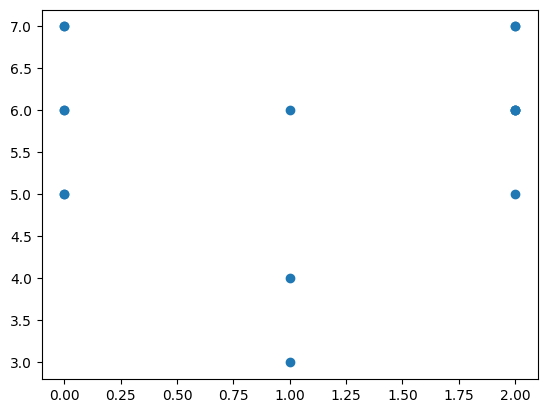

In [ ]:
#graficar como estan distribuidos los datos al ingresar
plt.scatter(df_train.iloc[:,0],df_train.iloc[:,1])
plt.show()

In [ ]:
#extraccion de variables de gastos

#li_varspend = [a for a in df_train.columns if a.startswith('Mnt')]    #gastos
#li_varspurh = [a for a in df_train.columns if a.endswith('Purchases')] #compras


In [ ]:
#df_train['spend_total']= df_train[li_varspend].sum(axis=1)
#df_train['Purchases_total']= df_train[li_varspurh].sum(axis=1)
#df_train['cant_hijos']= df_train['Kidhome'] + df_train['Teenhome']

In [ ]:
def plot_continuas(data, lista, fila, columna, top=1.9,hspace=0.7):
  plt.figure(figsize = (15,6))
  plt.subplots_adjust(top=top, hspace=hspace)
  for i,j in enumerate(sorted(lista)):
    plt.subplot(fila,columna,i+1)
    sns.boxplot(data[j])
    plt.title(f'{j}')
    plt.xlabel(' ')


In [ ]:
#
#li_varnum = set(df_train.columns)-set(['Kidhome','Teenhome'])
li_varnum = set(df_train.columns)


In [ ]:
#len(li_varnum)
len(li_varnum)

27

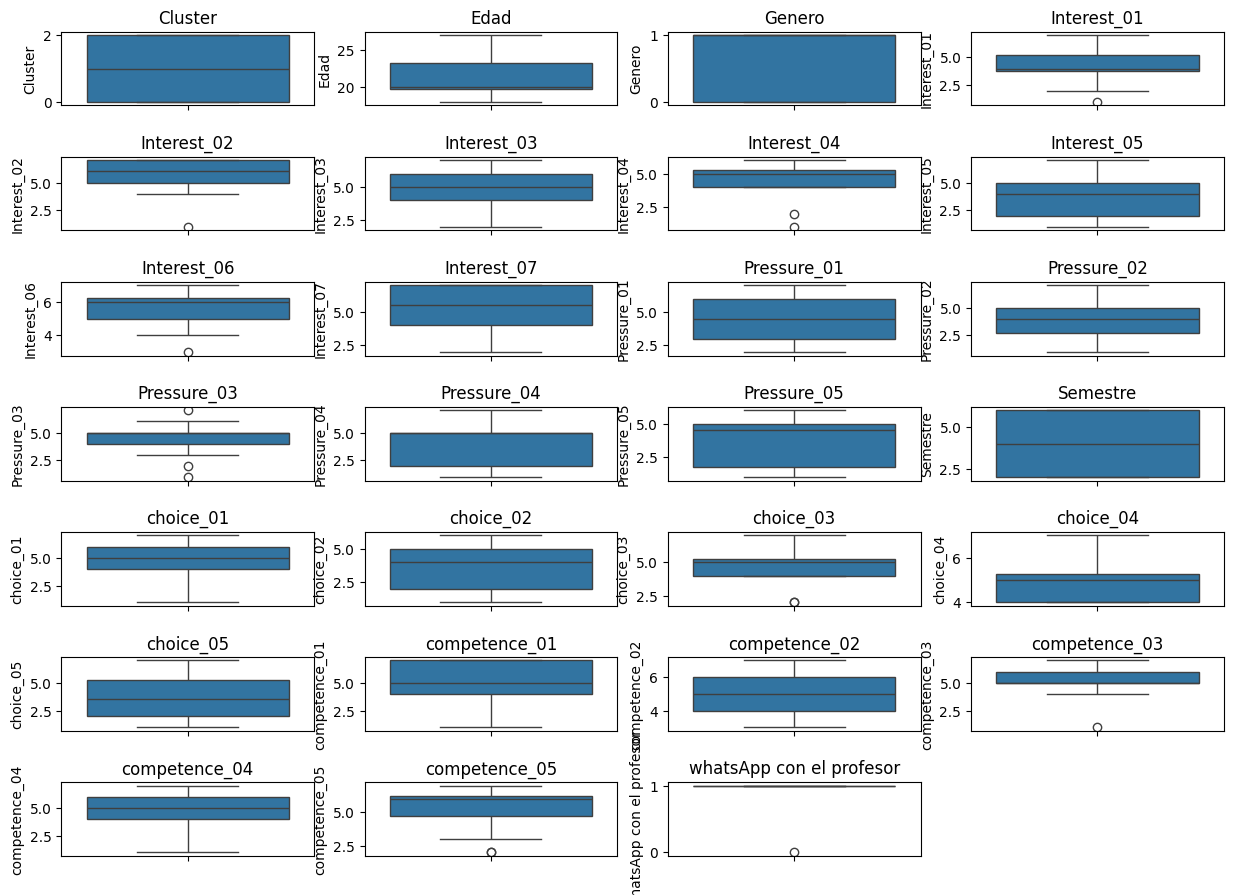

In [ ]:
#plot_continuas(df_train, li_varnum, 6,3)
#acomodar los graficos en forma 4 columnas por 9 filas
plot_continuas(df_train, li_varnum, 9,4)

In [ ]:
df_train_v2= df_train[list(li_varnum)].copy()
correlation_matriz = df_train_v2.corr().round(2)
correlation_matriz


,Pressure_05,Edad,Pressure_01,Pressure_02,competence_02,Interest_02,choice_03,competence_01,competence_05,choice_01,Genero,Cluster,Interest_05,competence_04,Interest_03,Interest_04,choice_05,whatsApp con el profesor,Pressure_03,choice_04,Interest_07,competence_03,Interest_01,Pressure_04,Interest_06,Semestre,choice_02
Pressure_05,1.00,-0.27,0.30,0.53,0.03,0.28,0.55,0.31,0.26,0.29,0.45,-0.52,0.70,0.20,0.49,0.44,0.42,0.37,0.48,0.26,0.28,0.39,0.58,0.78,0.36,0.16,0.70
Edad,-0.27,1.00,-0.00,-0.21,-0.16,-0.38,-0.12,-0.31,-0.20,-0.55,-0.09,0.02,-0.24,-0.27,0.09,-0.20,0.03,-0.55,-0.16,-0.20,-0.16,-0.51,-0.14,-0.27,-0.13,-0.11,-0.32
Pressure_01,0.30,-0.00,1.00,0.25,0.68,0.57,0.41,0.69,0.44,0.52,0.34,-0.02,0.25,0.15,0.37,0.48,0.25,0.36,0.54,0.13,0.46,0.60,0.74,0.38,0.25,0.36,0.31
Pressure_02,0.53,-0.21,0.25,1.00,0.16,0.31,0.58,0.40,0.45,0.27,0.66,-0.46,0.65,0.60,0.36,0.42,0.48,0.40,0.41,0.37,0.24,0.40,0.37,0.37,0.16,0.65,0.69
competence_02,0.03,-0.16,0.68,0.16,1.00,0.52,0.29,0.55,0.45,0.47,0.26,-0.11,0.20,0.12,0.17,0.46,0.18,0.40,0.46,0.11,0.19,0.62,0.49,0.26,0.26,0.47,0.25
Interest_02,0.28,-0.38,0.57,0.31,0.52,1.00,0.66,0.77,0.76,0.37,0.52,0.34,0.11,0.65,0.51,0.71,-0.35,0.79,0.63,0.06,0.74,0.75,0.66,0.31,0.39,0.24,0.36
choice_03,0.55,-0.12,0.41,0.58,0.29,0.66,1.00,0.52,0.74,0.14,0.66,-0.09,0.25,0.72,0.86,0.88,0.07,0.53,0.81,0.41,0.75,0.51,0.80,0.53,0.47,0.50,0.48
competence_01,0.31,-0.31,0.69,0.40,0.55,0.77,0.52,1.00,0.53,0.57,0.30,0.12,0.43,0.44,0.34,0.48,0.01,0.66,0.53,0.12,0.47,0.86,0.64,0.35,0.23,0.45,0.46
competence_05,0.26,-0.20,0.44,0.45,0.45,0.76,0.74,0.53,1.00,0.36,0.76,0.07,0.24,0.72,0.45,0.66,-0.05,0.51,0.57,0.38,0.81,0.54,0.59,0.40,0.66,0.62,0.45
choice_01,0.29,-0.55,0.52,0.27,0.47,0.37,0.14,0.57,0.36,1.00,0.19,-0.17,0.38,0.23,-0.03,0.27,0.23,0.50,0.39,0.48,0.34,0.76,0.39,0.57,0.15,0.38,0.20


<Axes: >

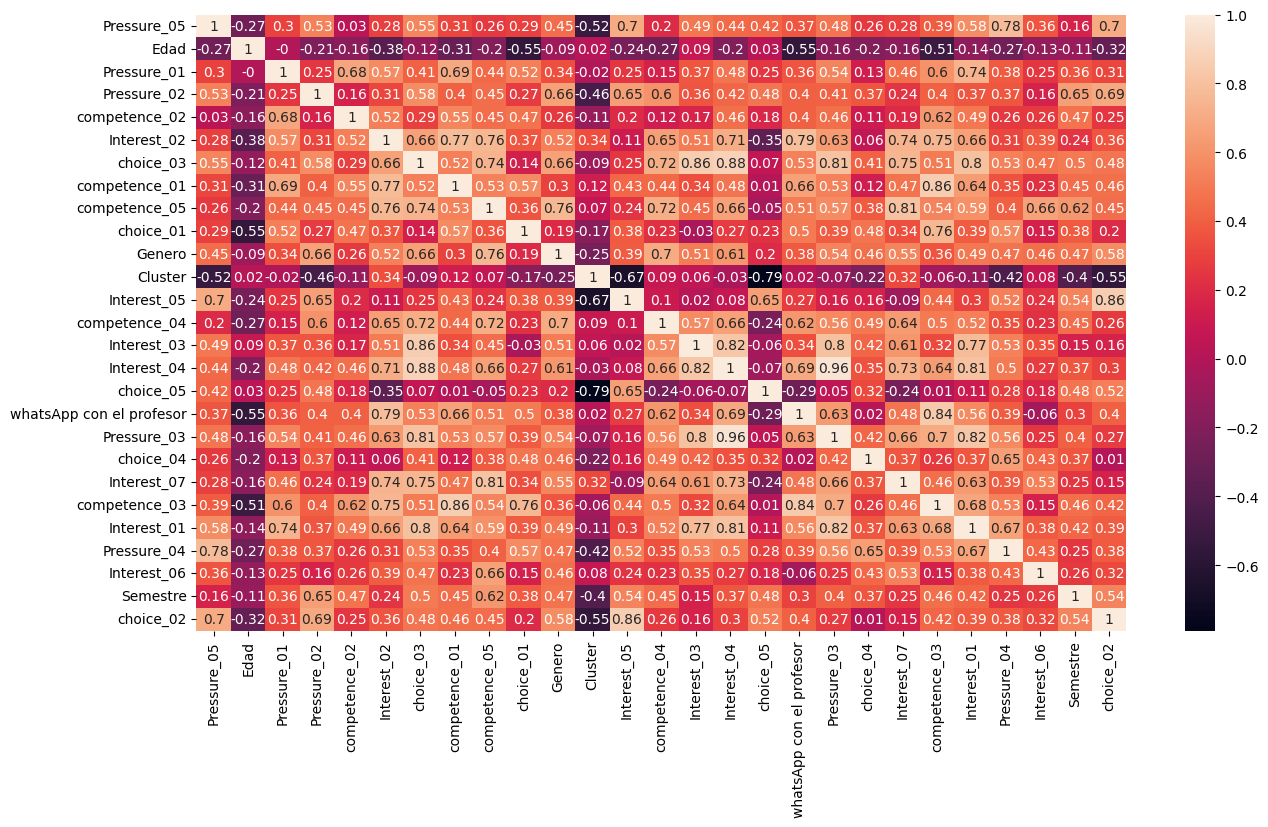

In [ ]:
#diagrama de calor para identificar correlacion
plt.figure(figsize=(15,8))
sns.heatmap(df_train_v2[list(li_varnum)].corr().round(2),annot=True)


**Limpieza y transformacion**

**Metodo de percentil**

Es una medida de posicion que divide la distribucion de datos en partes iguales

In [ ]:
#realizar limpieza
def fun_perc_atip(x,qmax,qmin):
  xmod=x.copy()
  dic_quanS = xmod.quantile(qmax)
  dic_quanI = xmod.quantile(qmin)

  xmod[xmod>dic_quanS] = dic_quanS
  xmod[xmod<dic_quanI] = dic_quanI

  return xmod

In [ ]:
#solo se seleccionan aquellos que requieran limpieza
#li_varlimp = ['edad','Recency','NumStorePurchases', 'cant_hijos','spend_total','Purchases_total']
li_varlimp = ['Interest_04','Pressure_03','competence_03', 'whatsApp con el profesor']

In [ ]:
#de todas las variables que no estan en varlim, esa seran tratadas
li_vatrat = [a for a in li_varnum if a not in li_varlimp]

In [ ]:
#seran tratadas 11 variables
len (li_vatrat)

23

In [ ]:
df_train_mod = df_train_v2[li_varlimp].copy()
for i in li_vatrat:
  df_train_mod[f'{i}_mod'] = fun_perc_atip(df_train_v2[i],0.97,0.03)

In [ ]:
#nuevo datframe con 17 variables
df_train_mod.head()

,Interest_04,Pressure_03,competence_03,whatsApp con el profesor,Pressure_05_mod,Edad_mod,Pressure_01_mod,Pressure_02_mod,competence_02_mod,Interest_02_mod,choice_03_mod,competence_01_mod,competence_05_mod,choice_01_mod,Genero_mod,Cluster_mod,Interest_05_mod,competence_04_mod,Interest_03_mod,choice_05_mod,choice_04_mod,Interest_07_mod,Interest_01_mod,Pressure_04_mod,Interest_06_mod,Semestre_mod,choice_02_mod
0,5,5,5,1,5,22.00,5,4.00,4.0,5.00,5.00,4.00,7,6,1,0,5.00,5.00,4.0,5,5,7,5.00,5,6.0,6,5
1,6,7,7,1,6,20.00,5,5.00,6.0,6.00,6.00,7.00,6,6,1,0,6.55,5.00,6.0,7,6,5,6.00,6,7.0,6,6
2,6,6,6,1,6,20.00,7,6.55,5.0,6.00,6.55,7.00,6,7,1,0,5.00,7.00,7.0,7,7,7,6.55,7,6.0,6,5
3,5,5,5,1,5,26.00,6,5.00,4.0,7.00,6.00,7.00,6,2,1,2,5.00,6.00,7.0,2,4,6,6.00,4,6.0,4,5
4,1,1,1,0,1,26.55,2,1.00,3.0,2.35,2.00,2.35,2,1,0,1,2.00,1.45,3.0,6,5,2,1.45,1,6.0,2,1


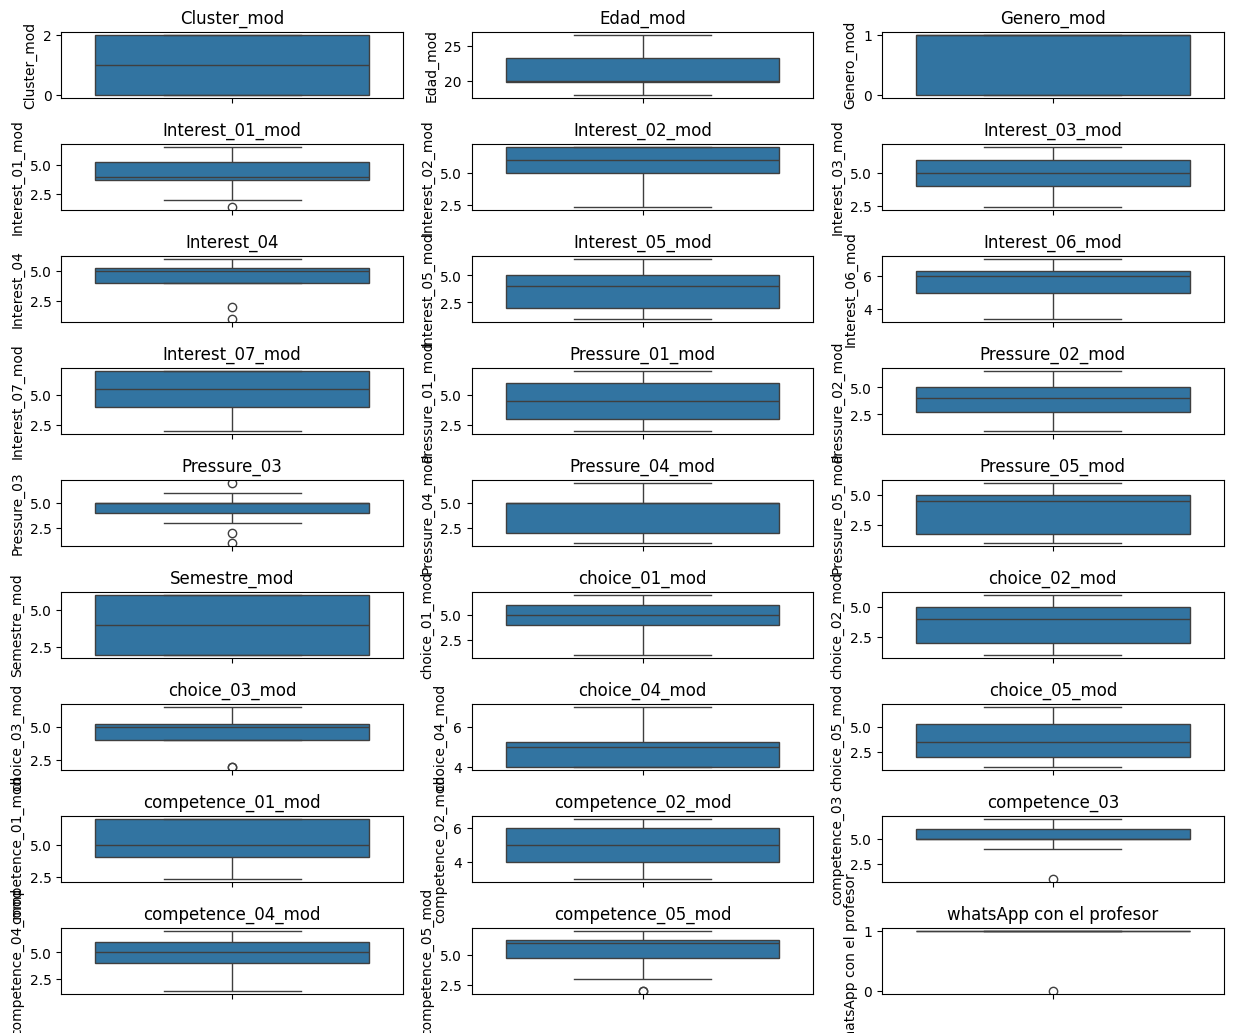

In [ ]:
plot_continuas(df_train_mod,set(df_train_mod.columns),10,3)

#plot_continuas(df_train, li_varnum, 9,4)

**Transformacion Logaritmica**

para que deje de mostrar variables atipicas

In [ ]:
#lista de variables a transformar
#li_varconv = ['MntFishProducts_mod', 'MntFishProducts_mod','MntMeatProducts_mod','MntSweetProducts_mod','MntFruits_mod']
li_varconv = ['Interest_01_mod', 'Interest_04','Pressure_03']

In [ ]:
df_var_log = df_train_mod[li_varconv].apply(np.log1p).rename(columns=lambda x:'log_'+x)
df_var_log.head(20)

,log_Interest_01_mod,log_Interest_04,log_Pressure_03
0,1.791759,1.791759,1.791759
1,1.945910,1.945910,2.079442
2,2.021548,1.945910,1.945910
3,1.945910,1.791759,1.791759
4,0.896088,0.693147,0.693147
5,1.791759,1.791759,1.791759
6,1.791759,1.609438,1.609438
7,1.386294,1.609438,1.609438
8,1.386294,1.791759,1.791759
9,1.609438,1.945910,1.791759


In [ ]:
x_train = pd.concat([df_train_mod.drop(li_varconv,axis=1),df_var_log],axis=1)

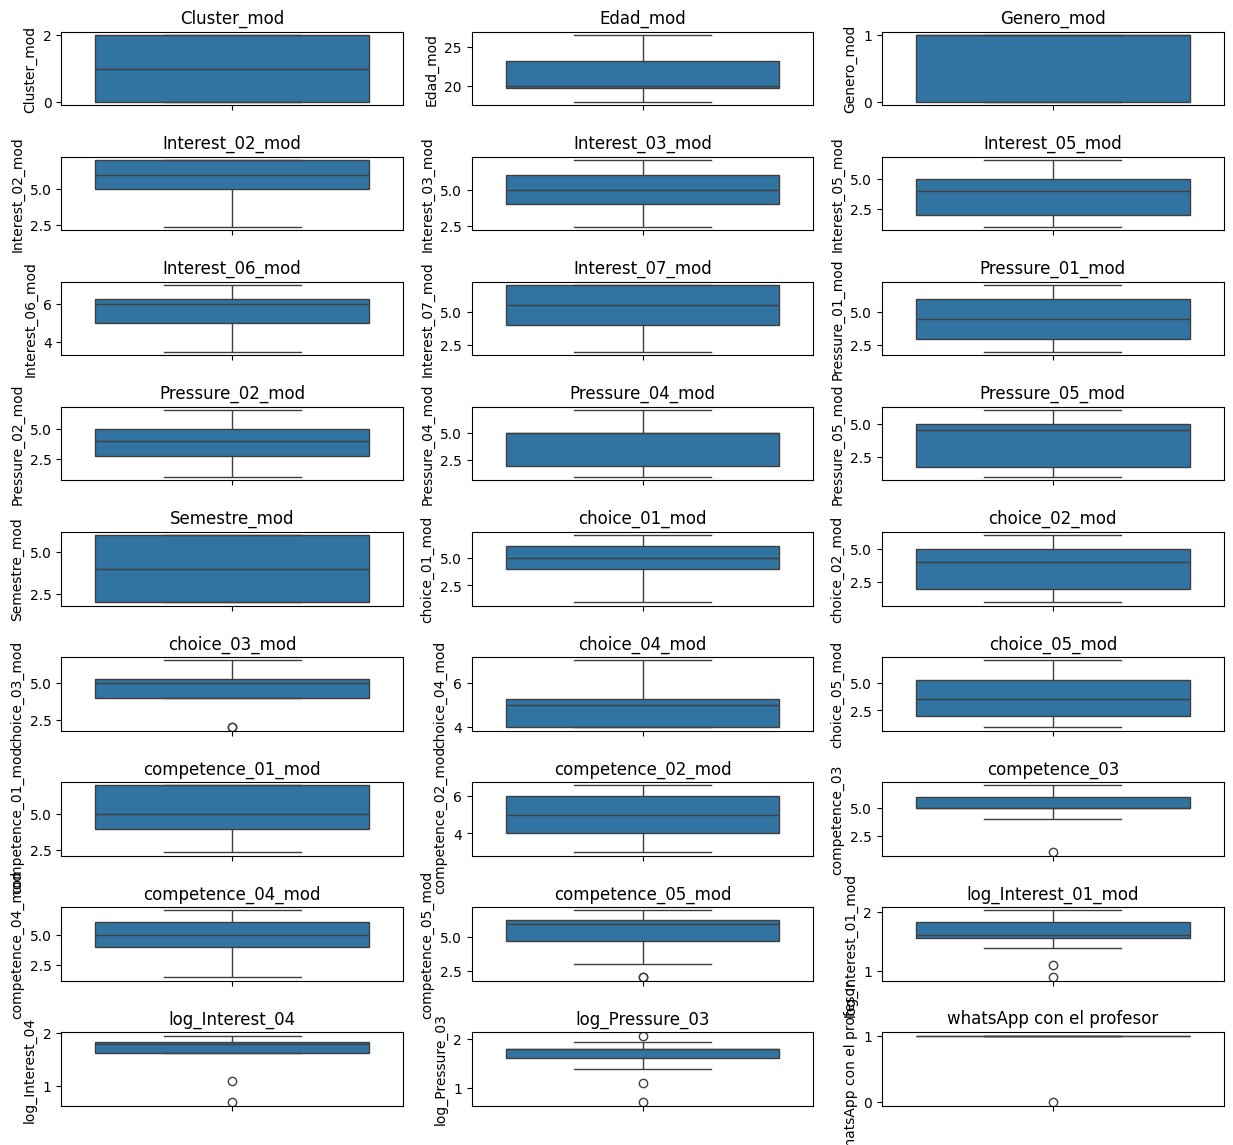

In [ ]:
plot_continuas(x_train,set(x_train.columns),9,3)

In [ ]:
x_train.shape

(16, 27)

**Reduccion dimenciones: componentes **principales

PCA (Análisis de Componente Principal)
Es un algoritmo matemático para reducir la dimensión de un conjunto de datos, con el fin de simplificar el número de variables mientras se retiene la mayor parte de información. Este intercambio de exactitud por simplicidad es muy usado para encontrar patrones en grandes segmentos de datos.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer

In [ ]:
# Check if there are NaNs in your original data
if x_train.isna().any().any():
    print("Warning: x_train contains NaNs. Imputing with mean.")
    # Impute NaNs with the mean of each column
    imputer = SimpleImputer(strategy='mean')
    x_train = imputer.fit_transform(x_train)


trans = MinMaxScaler()
trans_scal = trans.fit_transform(x_train)

In [ ]:


pca = PCA().fit(trans_scal)
ar_varianza =pca.explained_variance_ratio_

Text(0, 0.5, 'Suma acumulada')

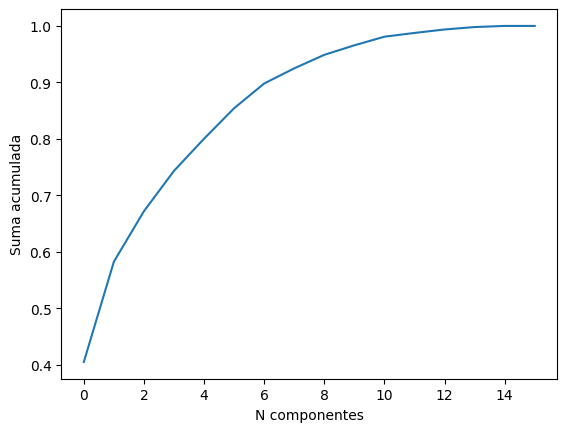

In [ ]:
plt.plot(np.cumsum(ar_varianza))
plt.xlabel('N componentes')
plt.ylabel("Suma acumulada")

In [ ]:
np.cumsum(ar_varianza)

array([0.4049942 , 0.58257096, 0.67193034, 0.74338266, 0.80025027,
       0.85424204, 0.89805821, 0.9248856 , 0.94880649, 0.96565115,
       0.98091901, 0.98757003, 0.99370077, 0.99799318, 1.        ,
       1.        ])

In [ ]:
#de acuerdo con la grafica superior se requieren 5 componentes para el 80%
mod_pca=PCA(5)
# de 16 dimensiones ahora solo quedaran 5
pca_value_trans = mod_pca.fit_transform(trans_scal)

In [ ]:
sum(mod_pca.explained_variance_ratio_)

0.8002502723040628

In [ ]:
df_comp = pd.DataFrame(pca_value_trans,columns=['PC1','PC2','PC3','PC4','PC5'])

In [ ]:
df_comp.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.696502,-0.533771,-0.226423,0.161111,-0.074080
1,-1.416392,-0.728700,0.141788,-0.122149,-0.047930
2,-1.676736,-0.459686,-0.090520,-0.209357,-0.418007
3,-0.541804,0.572533,-0.368203,0.086891,0.858247
4,2.635357,-0.838330,-0.457291,0.336720,-0.449664


**Analisis Clustering**

In [ ]:
from sklearn.cluster import KMeans

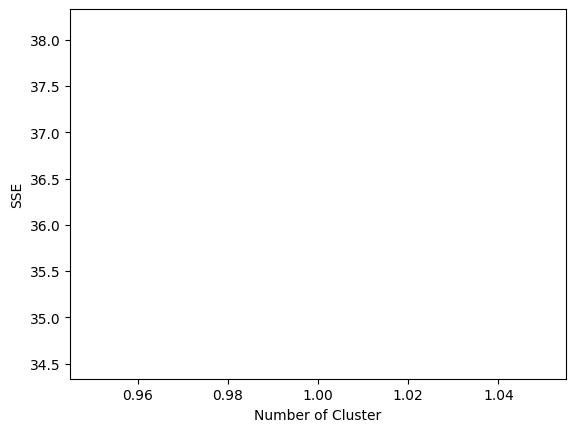

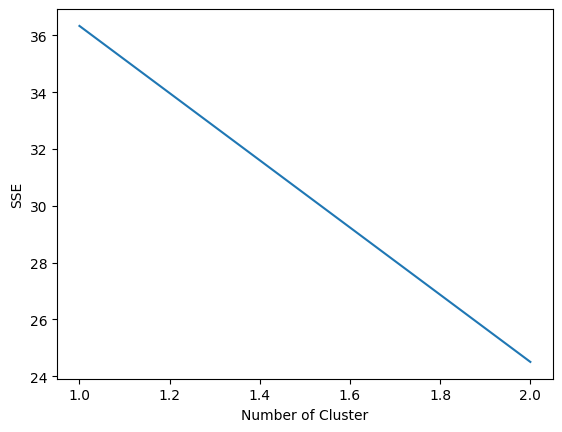

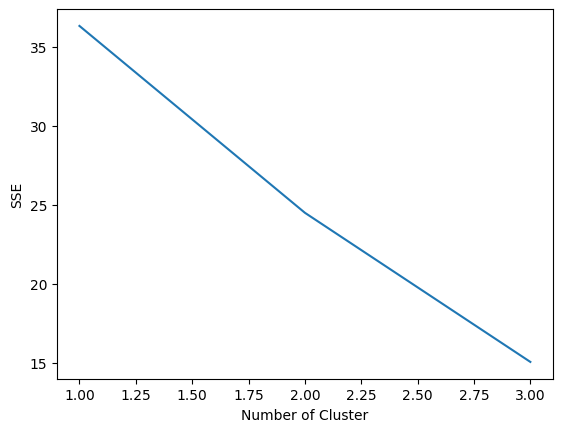

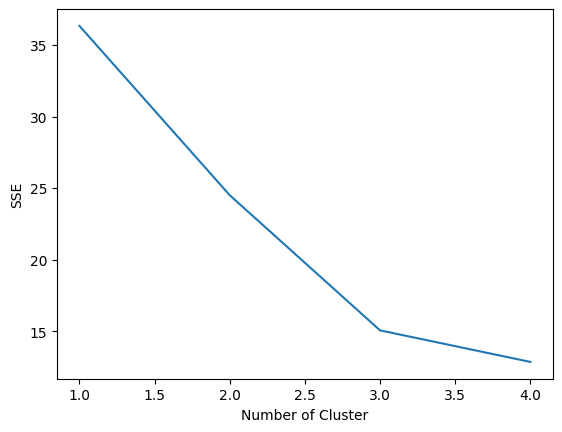

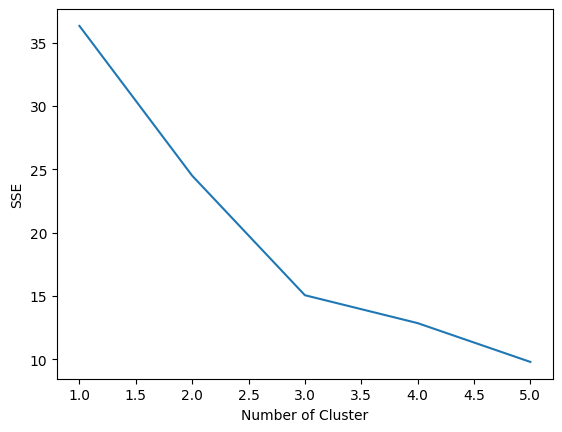

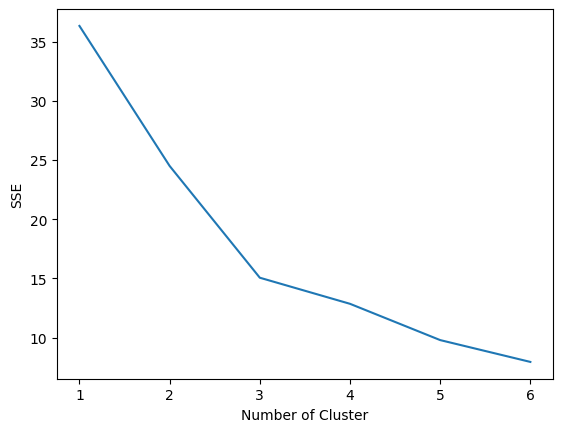

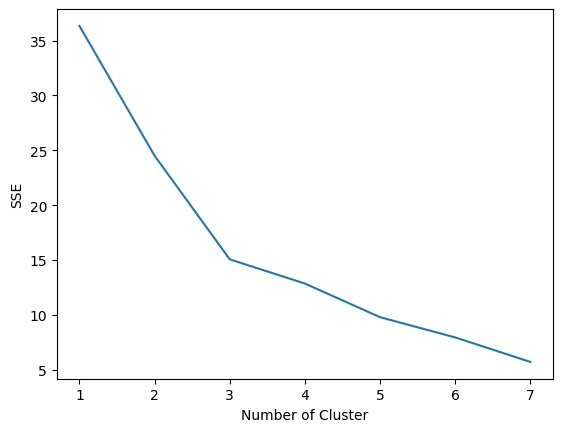

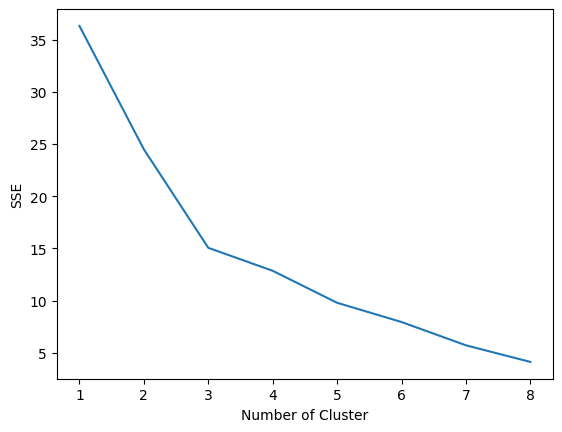

In [ ]:
#calcular la metrica SSE sum of Square Error para diferentes K
sse={}
for k in range(1,9):
  Kmeans = KMeans(n_clusters=k, max_iter=200,n_init=2).fit(pca_value_trans)
  sse[k] = Kmeans.inertia_   #inertia = suma de errores al cuadrado
  plt.figure()
  plt.plot(list(sse.keys()), list(sse.values()))
  plt.xlabel("Number of Cluster")
  plt.ylabel("SSE")
  plt.show()

  #CONSIDERA EL METODO DEL CODO PARA IDENTIFICAR EL NUMERO DE CLOSTER ADECUADO

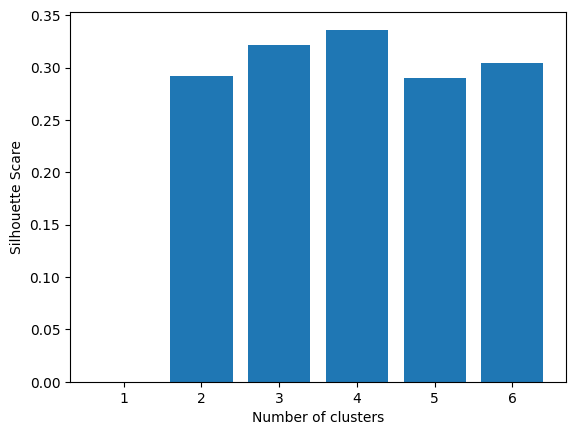

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = [0]

for n_cluster in range(2, 7):
  silhouette_scores.append(silhouette_score(pca_value_trans, KMeans(n_clusters = n_cluster).fit_predict(pca_value_trans)))
k = [1, 2, 3, 4, 5, 6]
plt.bar(k,silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Scare', fontsize=10)
plt.show()

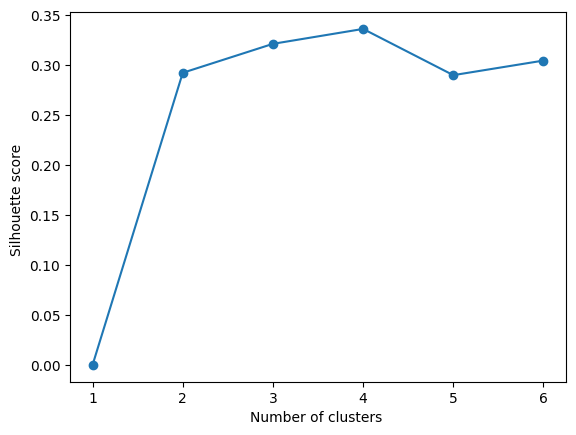

In [ ]:
#grafico de linea
plt.plot(k,silhouette_scores,marker='o')
plt.xlabel('Number of clusters ',fontsize=10)
plt.ylabel('Silhouette score ',fontsize=10)
plt.show()

In [ ]:
#usaremos tres cluster
Kmeans_kpi=KMeans(n_clusters=3,random_state=43)
Kmeans_kpi.fit(pca_value_trans)




KMeans(n_clusters=3, random_state=43)

In [ ]:
centroids = Kmeans_kpi.cluster_centers_
print(centroids)

[[-8.48442193e-01 -6.63710627e-01 -6.20731601e-02 -7.50554708e-03
  -8.75373202e-04]
 [ 1.83784634e+00 -3.61013725e-01  2.94510472e-02 -1.14066324e-01
  -1.92870860e-02]
 [-6.04122653e-02  7.23614991e-01  4.05836885e-02  5.53188937e-02
   9.01621390e-03]]


In [ ]:
df_comp['cluster']=Kmeans_kpi.labels_
df_train_mod['cluster']=Kmeans_kpi.labels_

In [ ]:
#que porcentaje hay en cada cluster
df_comp['cluster'].value_counts()/len(df_comp)

cluster
2    0.4375
0    0.3750
1    0.1875
Name: count, dtype: float64

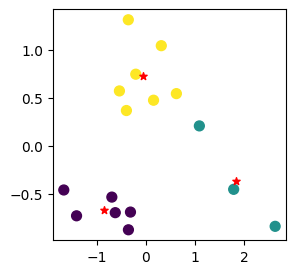

In [ ]:
#plot in clústers

plt.figure(figsize=(3,3))
plt.scatter(df_comp['PC1'],df_comp['PC2'],c=df_comp['cluster'],s=50)
plt.scatter(centroids[:,0],centroids[:,1],c='red',marker='*',s=30)



In [ ]:
#prediction
clust = Kmeans_kpi.predict(pca_value_trans)
print(clust)

[0 0 0 2 1 0 2 2 0 2 2 2 1 1 0 2]


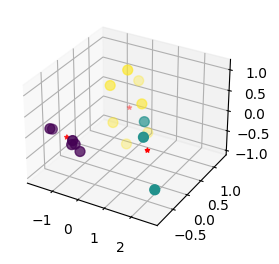

In [ ]:
# graficar en 3D

fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_comp['PC1'],df_comp['PC2'],df_comp['PC3'],c=df_comp['cluster'],s=50)
ax.scatter(centroids[:,0],centroids[:,1],c='red',marker='*',s=10)
plt.show()